In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
dataset=pd.read_csv("data_0104.csv")
dataset.head()

,정체,기준시간,기준시,기준일,VDS_ID,요일명,지점이정,노드명,도로이정,노선번호,도로명,교통량,평균속도
0,0,1,130,20210104,0500VDE08200,월요일,93.2,여주JC,88.29,500,영동선,22,5.44
1,0,3,330,20210104,0500VDS08200,월요일,93.2,여주IC,94.47,500,영동선,13,6.40
2,0,21,2130,20210104,0500VDS08200,월요일,93.2,여주IC,94.47,500,영동선,24,7.72
3,0,3,345,20210104,0500VDS08200,월요일,93.2,여주IC,94.47,500,영동선,12,7.79
4,0,22,2245,20210104,0500VDS08200,월요일,93.2,여주IC,94.47,500,영동선,11,7.80


In [3]:
dataset.isnull().sum()

정체        0
기준시간      0
기준시       0
기준일       0
VDS_ID    0
요일명       0
지점이정      0
노드명       0
도로이정      0
노선번호      0
도로명       0
교통량       0
평균속도      0
dtype: int64

In [4]:
dataset.describe()

,정체,기준시간,기준시,기준일,지점이정,도로이정,노선번호,교통량,평균속도
count,99027.000000,99027.000000,99027.000000,99027.0,99027.000000,99027.000000,99027.000000,99027.000000,99027.000000
mean,0.991255,11.510012,1173.502530,20210104.0,172.906762,172.866345,191.334686,322.315459,97.436496
std,0.093106,6.932438,693.448104,0.0,108.141947,108.311559,236.584643,323.045462,15.898978
min,0.000000,0.000000,0.000000,20210104.0,1.300000,0.200000,10.000000,1.000000,5.440000
25%,1.000000,5.000000,545.000000,20210104.0,84.400000,79.630000,10.000000,89.000000,90.820000
50%,1.000000,12.000000,1200.000000,20210104.0,161.200000,160.010000,10.000000,202.000000,96.540000
75%,1.000000,18.000000,1800.000000,20210104.0,239.770000,234.400000,500.000000,451.000000,102.160000
max,1.000000,23.000000,2345.000000,20210104.0,415.300000,416.050000,500.000000,2277.000000,200.000000


In [5]:
X=dataset.drop('정체',axis=1) #Predictors
y=dataset['정체'] #Response
X.head()


,기준시간,기준시,기준일,VDS_ID,요일명,지점이정,노드명,도로이정,노선번호,도로명,교통량,평균속도
0,1,130,20210104,0500VDE08200,월요일,93.2,여주JC,88.29,500,영동선,22,5.44
1,3,330,20210104,0500VDS08200,월요일,93.2,여주IC,94.47,500,영동선,13,6.40
2,21,2130,20210104,0500VDS08200,월요일,93.2,여주IC,94.47,500,영동선,24,7.72
3,3,345,20210104,0500VDS08200,월요일,93.2,여주IC,94.47,500,영동선,12,7.79
4,22,2245,20210104,0500VDS08200,월요일,93.2,여주IC,94.47,500,영동선,11,7.80


In [6]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [7]:
X.head()

,기준시간,기준시,기준일,VDS_ID,요일명,지점이정,노드명,도로이정,노선번호,도로명,교통량,평균속도
0,1,6,0,723,0,147,64,34,1,1,21,0
1,3,14,0,915,0,147,63,36,1,1,12,1
2,21,86,0,915,0,147,63,36,1,1,23,2
3,3,15,0,915,0,147,63,36,1,1,11,3
4,22,91,0,915,0,147,63,36,1,1,10,4


In [8]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,기준시간_1,기준시간_2,기준시간_3,기준시간_4,기준시간_5,기준시간_6,기준시간_7,기준시간_8,기준시간_9,기준시간_10,...,평균속도_8217,평균속도_8218,평균속도_8219,평균속도_8220,평균속도_8221,평균속도_8222,평균속도_8223,평균속도_8224,평균속도_8225,평균속도_8226
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
#train set oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 11)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('SMOTE 적용 전', X_train.shape, y_train.shape)
print('SMOTE 적용 후', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 전 레이블 값 분포:\n', pd.Series(y_train).value_counts())
print('SMOTE 적용 후 레이블 값 분포:\n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 (69318, 11806) (69318,)
SMOTE 적용 후 (137432, 11806) (137432,)
SMOTE 적용 전 레이블 값 분포:
 1    68716
0      602
dtype: int64
SMOTE 적용 후 레이블 값 분포:
 0    68716
1    68716
dtype: int64


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_over = sc.fit_transform(X_train_over)
X_test = sc.transform(X_test)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train_over = pca.fit_transform(X_train_over)
X_test = pca.transform(X_test)

In [13]:
def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
def visualization_test(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

In [14]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [15]:
def print_score(classifier,X_train_over,y_train_over,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train_over,classifier.predict(X_train_over))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train_over,classifier.predict(X_train_over))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train_over,classifier.predict(X_train_over))))
        res = cross_val_score(classifier, X_train_over, y_train_over, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train_over,y_train_over)

LogisticRegression()

In [17]:
print_score(classifier,X_train_over,y_train_over,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.7123

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72     68716
           1       0.73      0.67      0.70     68716

    accuracy                           0.71    137432
   macro avg       0.71      0.71      0.71    137432
weighted avg       0.71      0.71      0.71    137432


Confusion Matrix:
[[52054 16662]
 [22878 45838]]

Average Accuracy:	0.7121

Standard Deviation:	0.0044


In [18]:
print_score(classifier,X_train_over,y_train_over,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.6601

Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.53      0.03       264
           1       0.99      0.66      0.79     29445

    accuracy                           0.66     29709
   macro avg       0.50      0.60      0.41     29709
weighted avg       0.99      0.66      0.79     29709


Confusion Matrix:
[[  141   123]
 [ 9975 19470]]



In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

lr_probs = classifier.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)

In [22]:
print('Logistic Regression: ROC AUC = %.3f' % (lr_auc))

Logistic Regression: ROC AUC = 0.779


In [23]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

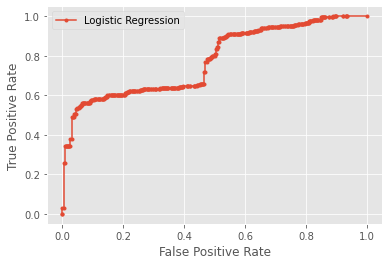

In [24]:
import matplotlib.pyplot as plt
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()